<a href="https://colab.research.google.com/github/MrAjulo/Personal-Projects/blob/master/Human_Horse_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2020-05-15 07:57:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  61.1MB/s    in 2.3s    

2020-05-15 07:57:06 (61.1 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os 
import zipfile

In [0]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
#Directory with training horse pictures 
train_horse_dr = os.path.join('/tmp/horse-or-human/horses')

#Directory with our training human pictures
train_human_dr = os.path.join('/tmp/horse-or-human/humans')

In [0]:
train_horse_name = os.listdir(train_horse_dr)
print(train_horse_name[:10])

['horse09-8.png', 'horse23-9.png', 'horse34-9.png', 'horse07-5.png', 'horse39-4.png', 'horse34-3.png', 'horse07-2.png', 'horse04-1.png', 'horse41-2.png', 'horse08-3.png']


In [0]:
train_human_name = os.listdir(train_human_dr)
print(train_human_name[:10])

['human05-06.png', 'human01-21.png', 'human14-26.png', 'human04-07.png', 'human12-26.png', 'human07-09.png', 'human10-24.png', 'human11-24.png', 'human02-20.png', 'human10-22.png']


In [0]:
#Lets find the total number of horse and human images 
print('Total training horse images: ', len(os.listdir(train_horse_dr)))
print('Total training human images: ', len(os.listdir(train_human_dr)))

Total training horse images:  500
Total training human images:  527


In [0]:
%matplotlib inline 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

nrows = 4
ncols = 4

pic_index = 0

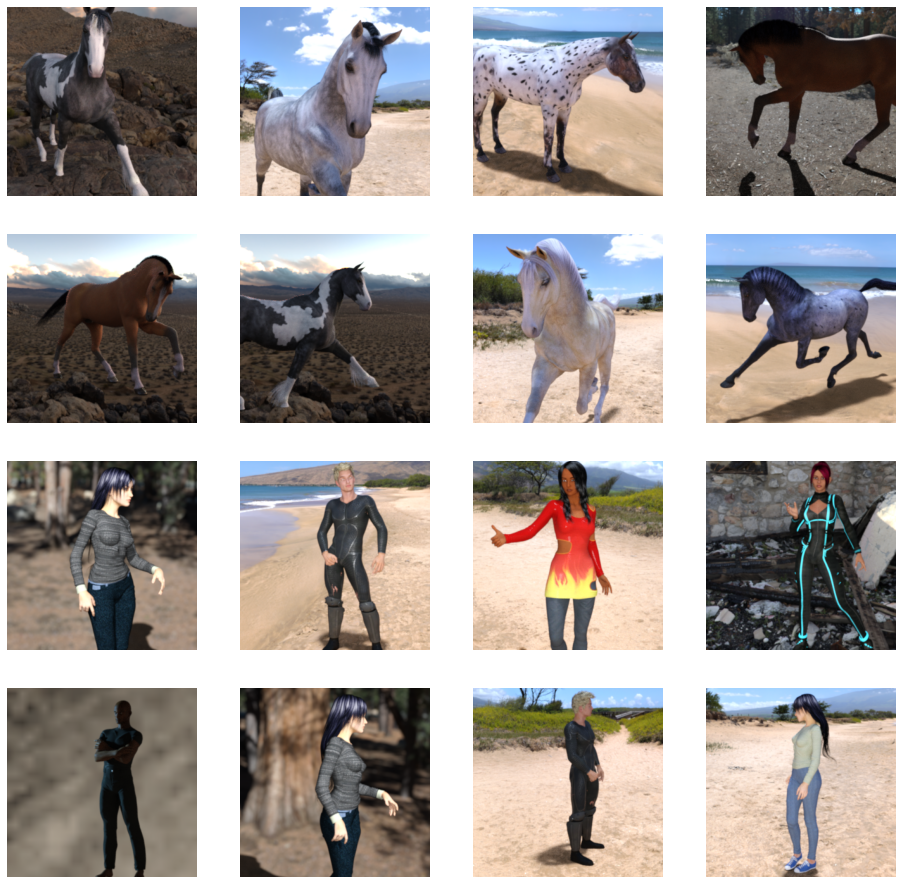

In [0]:
fig = plt.gcf()
fig.set_size_inches(ncols* 4, nrows*4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dr,fname)
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dr,fname)
                for fname in train_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape= (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy',
              optimizer= RMSprop(lr = 0.001),
              metrics= ['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1,/255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using the train_datagen generator 
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size = (300,300),
        batch_size = 128,
        class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch = 8,
          epochs=15,
          verbose = 1
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
8/8 [==============================] - 72s 9s/step - loss: 1.0680 - acc: 0.5322
Epoch 2/15
8/8 [==============================] - 71s 9s/step - loss: 0.7423 - acc: 0.5562
Epoch 3/15
8/8 [==============================] - 61s 8s/step - loss: 0.5593 - acc: 0.7353
Epoch 4/15
8/8 [==============================] - 60s 8s/step - loss: 0.7003 - acc: 0.7308
Epoch 5/15
8/8 [==============================] - 60s 8s/step - loss: 0.3929 - acc: 0.8154
Epoch 6/15
8/8 [==============================] - 61s 8s/step - loss: 0.2988 - acc: 0.8865
Epoch 7/15
8/8 [==============================] - 61s 8s/step - loss: 0.2645 - acc: 0.8932
Epoch 8/15
8/8 [==============================] - 61s 8s/step - loss: 0.1218 - acc: 0.9522
Epoch 9/15
8/8 [==============================] - 63s 8s/step - loss: 0.3632 - acc: 0.8754
Epoch 10/15
8/8 [==============================] - 70s 9s/step - loss: 0.1462 - acc: 0.9424
Epoch 11/15
8

In [0]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image 


In [0]:
uploaded = files.upload()

Saving pexels-photo-733872.jpeg to pexels-photo-733872.jpeg


In [0]:
for fn in uploaded.keys():
  path = '/content/' + fn 
  img = image.load_img(path, target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")



[1.]
pexels-photo-733872.jpeg is a human


In [0]:
uploaded = files.upload()

Saving happy-horse.jpg to happy-horse.jpg


In [0]:
for fn in uploaded.keys():
  path = '/content/' + fn 
  img = image.load_img(path, target_size = (300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0]> 0.5:
    print(fn+ ' is a human')
  else:
    print(fn + ' is a horse')

[0.]
happy-horse.jpg is a horse
